In [1]:
import sys 
import os
sys.path.append(os.path.abspath("..")) # so we can find didson.py, multibeam.py

from glob import glob           # file manipulation
import numpy as np
from skimage.io import imread   # image processing
from scipy.optimize import curve_fit
from scipy.stats import *       # stats utils

from matplotlib import rcParams 
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Latin Modern Math']
# print rcParams['font.size']

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sonar import Sonar
from didson import Didson

didson = Didson();
didson.loadConfig('../data/DIDSON/didson.json')
print 'Pings are',didson.num_beams,'beams by',didson.num_bins, 'bins'
print 'Field of view:', didson.fov
print 'Range:', didson.min_range, ' - ', didson.max_range, 'm.'
print 'Noise:', didson.noise
print 'RX gain:', didson.rx_gain,'dB'

Pings are 96 beams by 512 bins
Field of view: 0.502654824574
Range: 2.25  -  11.25 m.
Noise: 0.002
RX gain: 20.0 dB


In [3]:
test_image_list = sorted(glob('../data/test/*.png')) # window set to 2.25m to 11.25m
test_config_list = sorted(glob('../data/test/*.json'))
print len(test_image_list),'image files,', len(test_config_list),'config files'

# for i in range(0,len(test_image_list)):
#     print(test_image_list[i])
#     print(test_config_list[i])
#     print(' ')

10 image files, 10 config files


In [4]:
import utils

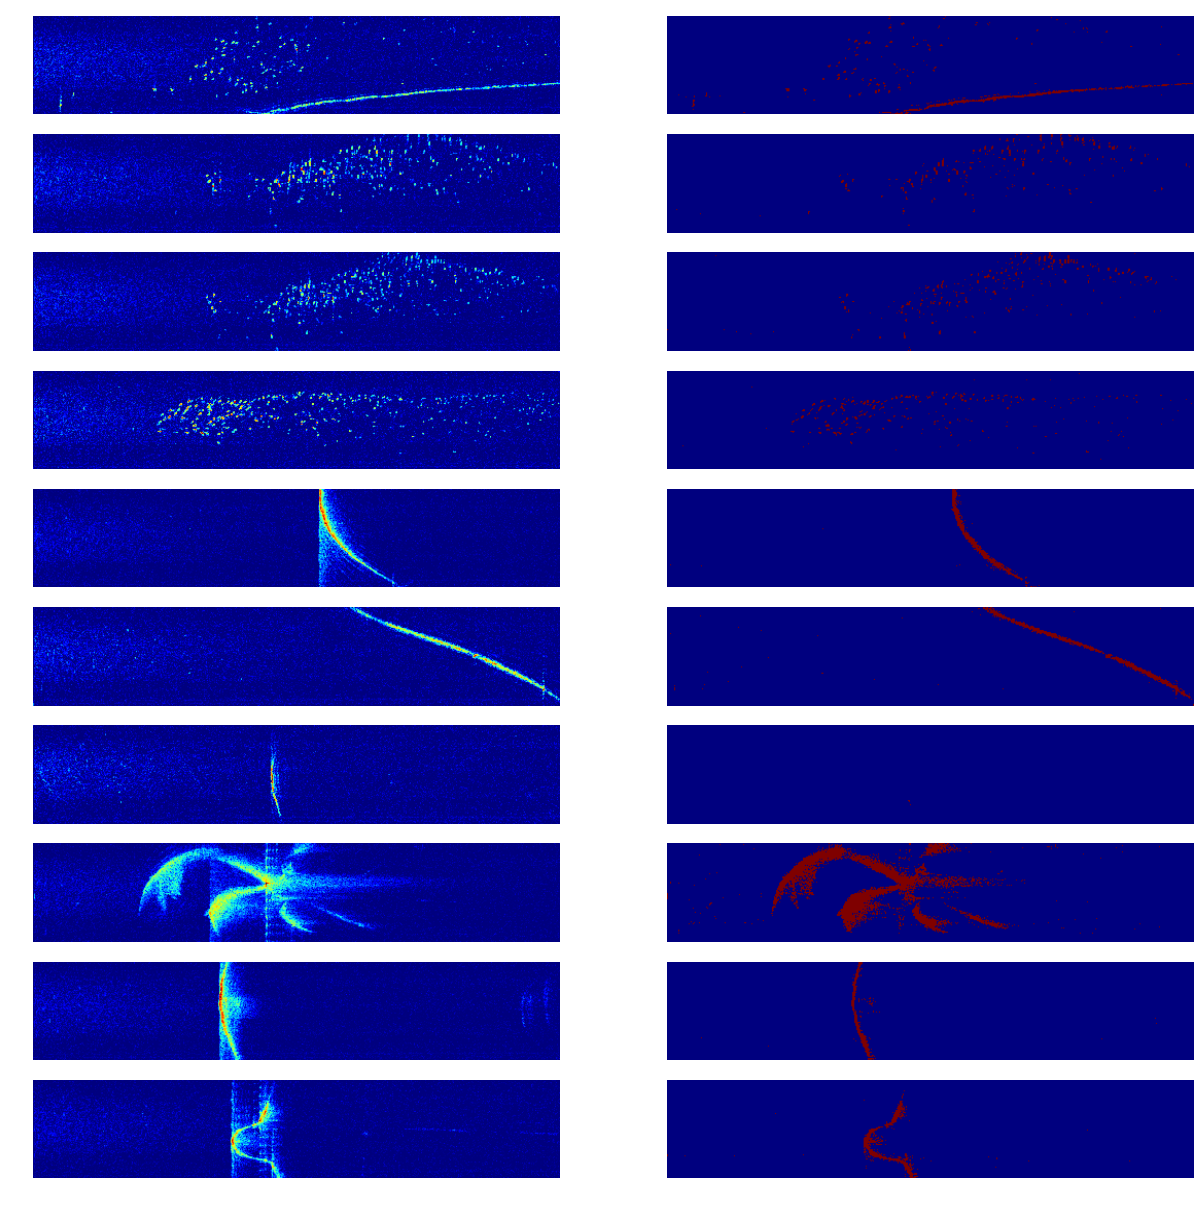

In [29]:
plt.figure(figsize=(15,15))

for idx in range(0,len(test_image_list)):
    image = (1/255.0)*imread(test_image_list[idx],as_grey = True)
    didson.loadConfig(test_config_list[idx])
    image_d = didson.deconvolve(image)
    image_d = didson.removeTaper(image_d)
    
    p = utils.getMixtureParameters(image_d)
#     print test_image_list[idx], p
    
    image_likelihood = utils.likelihood(image_d,p[0],p[1],p[2],p[3])
    eta = (1-p[1])/p[1]
    img_bin = image_likelihood
    img_bin[img_bin<eta] = 0.0
    img_bin[img_bin>=eta] = 1.0
#     print image_likelihood.min(), image_likelihood.max(),  'eta:',eta
    plt.subplot(10,2,2*idx+1)
    plt.imshow(image.transpose())
    plt.axis('off')
    
    plt.subplot(10,2,2*idx+2)

    plt.imshow(img_bin.transpose())
    plt.axis('off')
    plt.tight_layout

../data/test/1468966347175925.png [ 0.30110998  0.01936547  0.01751426  0.13375461]
eta: 56.096328432
../data/test/1468966376377511.png [ 0.30855544  0.01290416  0.02470654  0.1597748 ]
eta: 39.4751092092
../data/test/1468966376476216.png [ 0.30243361  0.01398022  0.02279021  0.14132517]
eta: 42.8784831805
../data/test/1468966851909797.png [ 0.30115379  0.01349532  0.02538259  0.13983649]
eta: 38.3970852432
../data/test/1468969086135548.png [ 0.30579632  0.01194032  0.0202088   0.18027693]
eta: 48.4833819067
../data/test/1468970074505798.png [ 0.29783121  0.01875268  0.0127644   0.09484734]
eta: 77.3429115468
../data/test/1468970271148135.png [  3.22137374e-01   2.45126260e-09   1.78507702e-02   9.99999973e-01]
eta: 55.0199916906
../data/test/1468970485675274.png [ 0.2709387   0.09809799  0.0331402   0.13919279]
eta: 29.1748288558
../data/test/1468970745714629.png [ 0.32081766  0.00944131  0.02675598  0.21525023]
eta: 36.3748179722
../data/test/1468970832506128.png [ 0.31666886  0.0144619   0.02318888  0.17092262]
eta: 42.12412589
